In [1]:
import numpy as np

In [2]:
def f(x):
    return x.T @ A @ x

def grad_f(x):
    return 2 * A @ x

def hess_f(x):
    return 2 * A

def backline_search(x):
    t = 1
    while f(x - t * grad_f(x)) > f(x) - a * t * np.linalg.norm(grad_f(x))**2:
        t = b * t
    return t

In [3]:
a = 0.3
b = 0.7
e = 10**-10
lambdas = [i for i in [10**i for i in range(6)]]

In [137]:
iters = []
for lam in lambdas:
    A = np.array([[1+lam,1-lam],[1-lam,1+lam]])
    k = 0
    x = np.array([1,2])
    while np.linalg.norm(grad_f(x)) >= e:
        t = backline_search(x)
        x = x - t * grad_f(x)
        k += 1
    print(k)
    iters.append(k)


26
117
989
11768
124331
1166418


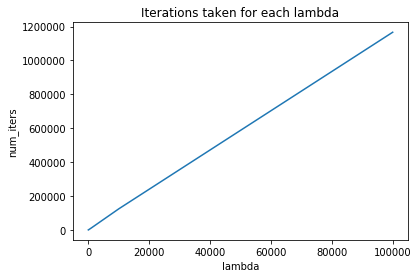

In [141]:
import matplotlib.pyplot as plt
plt.plot(lambdas, iters)
plt.title("Iterations taken for each lambda")
plt.xlabel('lambda')
plt.ylabel('num_iters')
plt.show()

In [4]:
iters = []
for lam in lambdas:
    A = np.array([[1+lam,1-lam],[1-lam,1+lam]])
    k = 0
    x = np.array([1,2])
    while np.linalg.norm(grad_f(x)) >= e:
        t = backline_search(x)
        x = x - t * grad_f(x) @ np.linalg.inv(hess_f(x))
        k += 1
    print(k)
    iters.append(k)


61
922
8614
113155
1033428


KeyboardInterrupt: 

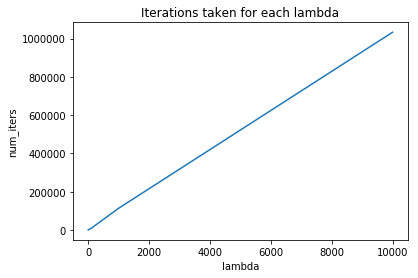

In [7]:
import matplotlib.pyplot as plt
plt.plot(lambdas[:-1], iters)
plt.title("Iterations taken for each lambda")
plt.xlabel('lambda')
plt.ylabel('num_iters')
plt.show()